In [1]:
#Imports
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
from google.colab import drive


# modelling
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer #Z-score variables
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor # gradient boosting
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Decision Tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # random fores
from sklearn.linear_model import Lasso

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer

# performance
from sklearn.metrics import accuracy_score, confusion_matrix,\
 f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.calibration import calibration_curve
from sklearn.model_selection import GridSearchCV

# model validation imports
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv

# pipeline imports
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
leagueDataOld = pd.read_csv("/content/drive/MyDrive/392FinalProject/fullData.csv")
leagueDataOld.head()

,Unnamed: 0,matchId,allInPings0,assistMePings0,assists0,baronKills0,basicPings0,bountyLevel0,champExperience0,champLevel0,...,riotIdName0,riotIdName1,riotIdName2,riotIdName3,riotIdName4,riotIdName5,riotIdName6,riotIdName7,riotIdName8,riotIdName9
0,0,EUW1_6882416210,1,2,3,0,0,0,13138,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,EUW1_6881092720,0,3,10,0,0,0,13365,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,EUW1_6879405717,0,1,2,0,0,0,11759,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,EUW1_6879389461,1,7,10,0,0,0,16824,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,EUW1_6879371828,0,6,2,1,0,0,12912,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#drop all variables I determined were not valuable
leagueDropListPre = ["allInPings", "assistMePings", "basicPings", "commandPings", "consumablesPurchased", "dangerPings","doubleKills", "eligibleForProgression",
                     "enemyMissingPings", "enemyVisionPings", "gameEndedInEarlySurrender", "gameEndedInSurrender", "getBackPings", "holdPings", "itemsPurchased",
                     "largestCriticalStrike", "onMyWayPings", "participantId", "perks", "placement", "playerSubteamId", "profileIcon", "pushPings", "riotIdGameName",
                     "riotIdTagline", "needVisionPings" , "teamEarlySurrendered", "puuid", "summonerId", "summonerName", "teamId", "missions", "individualPosition", "teamPosition",
                     "visionClearedPings", "visionScore", "champExperience", "bountyLevel", "riotIdName", "baitPings",
                     "championTransform", "role", "nexusKills", "nexusLost", "nexusTakedowns"]
# leagueData.head()
leagueDropListPost = []

for i in range(len(leagueDropListPre)):
  for k in range(10):
    currentTag = leagueDropListPre[i] + str(k)
    leagueDropListPost.append(currentTag)

leagueDataMid = leagueDataOld.drop(leagueDropListPost, axis = 1)
leagueData = leagueDataMid.drop(["Unnamed: 0", "matchId", "win1", "win2", "win3", "win4", "win5", "win6", "win7", "win8", "win9"], axis = 1)

leagueData = leagueData.dropna(axis = 1, how = "any") #delete all columns which are NaN



#successfully dropped all values shown in list above for all players 0-9


if "win0" in leagueData.columns:
  print("hell yeah")
else:
  print("not in df")

leagueData.head()

hell yeah


,assists0,baronKills0,champLevel0,championId0,championName0,damageDealtToBuildings0,damageDealtToObjectives0,damageDealtToTurrets0,damageSelfMitigated0,deaths0,...,trueDamageDealt9,trueDamageDealtToChampions9,trueDamageTaken9,turretKills9,turretTakedowns9,turretsLost9,unrealKills9,visionWardsBoughtInGame9,wardsKilled9,wardsPlaced9
0,3,0,15,114,Fiora,10464,11248,10464,21995,11,...,2611,674,142,1,4,5,0,5,7,17
1,10,0,15,266,Aatrox,3472,5378,3472,15550,8,...,2918,1176,398,0,1,3,0,2,5,36
2,2,0,14,86,Garen,2692,5447,2692,32894,8,...,2975,32,612,1,5,3,0,1,5,25
3,10,0,17,86,Garen,14570,20163,14570,52204,6,...,3456,480,1312,0,3,11,0,7,8,32
4,2,1,14,86,Garen,7487,14939,7487,39658,5,...,3764,0,652,0,7,6,0,1,4,18


In [ ]:
#Steps for Q1
# 1.  Make a  model that finds these games
# 2.  Evaluate how well it predicts wins - make a confusion matrix
# 3.  Find 50 games from each elo and make API calls for them
# 4.  Sort data to fit well and test model on each of them
# 5.  Graph the results

# we need to predict whether the first 5 players or the second 5 players win the match.
#leagueData.reset_index(inplace = True)

In [4]:
# 1.  Make a  model that finds these games
nonContinPre = ["item0", "item1", "item2", "item3", "item4", "item5", "lane",
                "summoner1Id", "summoner2Id", "championName"]

nonContin = []

for i in range(len(nonContinPre)):
  for k in range(10):
    currentTag = nonContinPre[i] + str(k)
    nonContin.append(currentTag) #make all of our nonContinData

contin = []
predictors = []

for col in leagueData.columns:
  predictors.append(col) #get all predictors in one spot
  if col not in nonContin:
    contin.append(col) #make all of our continuous data

predictors.remove("win0") #remove the predicted value from our predictors
contin.remove("win0")

#win0 is in leagueData - confirmed

X = leagueData[predictors]
y = leagueData["win0"] #predicts whether the first player wins

#TTS
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234)

# create empty model
z = make_column_transformer((StandardScaler(), contin),
                              (OneHotEncoder(handle_unknown = "ignore"), nonContin),
                              remainder = "passthrough")

forestModel = RandomForestClassifier(random_state = 1234)

forest = Pipeline([("zscore", z),
    ("tree", forestModel)])

# fit
forest.fit(X_train, y_train)


#accuracy, precision, recall, f1score


Pipeline(steps=[('zscore',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['assists0', 'baronKills0',
                                                   'champLevel0', 'championId0',
                                                   'damageDealtToBuildings0',
                                                   'damageDealtToObjectives0',
                                                   'damageDealtToTurrets0',
                                                   'damageSelfMitigated0',
                                                   'deaths0',
                                                   'detectorWardsPlaced0',
                                                   'dragonKills0',
                                                   'firstBloodAssist0',
                                                   'firstBlood...
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['item00', 'item01', 'item02',
                                                   'item03', 'item04', 'item05',
                                                   'item06', 'item07', 'item08',
                                                   'item09', 'item10', 'item11',
                                                   'item12', 'item13', 'item14',
                                                   'item15', 'item16', 'item17',
                                                   'item18', 'item19', 'item20',
                                                   'item21', 'item22', 'item23',
                                                   'item24', 'item25', 'item26',
                                                   'item27', 'item28', 'item29', ...])])),
                ('tree', RandomForestClassifier(random_state=1234))])

Train Acc       :  1.0
Train Prescision:  1.0
Train Recall    :  1.0
Train F1        :  1.0
Train ROC AUC   :  1.0
Test Acc        :  0.979114971050455
Test Prescision :  0.9815270935960592
Test Recall     :  0.9771148344912137
Test F1         :  0.9793159942658203
Test ROC AUC    :  0.9985402547399598


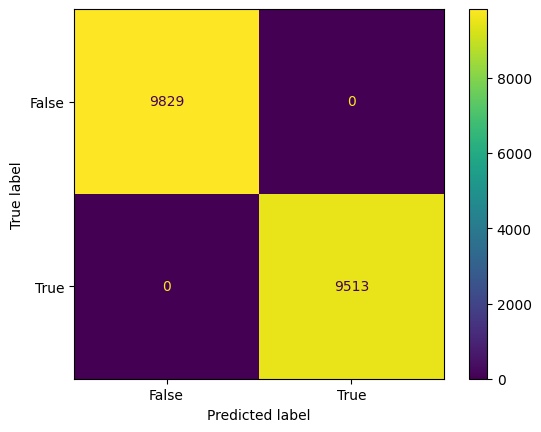

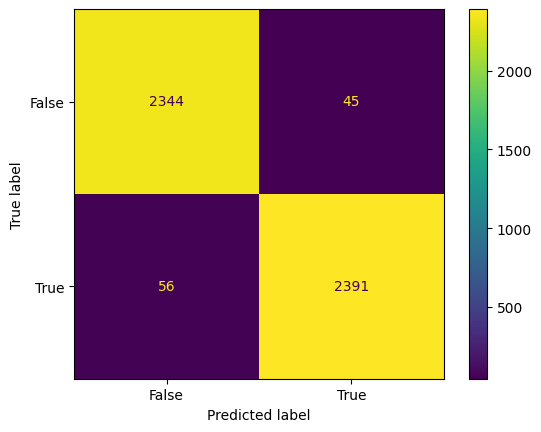

In [5]:
# 2.  Evaluate how well it predicts wins - make a confusion matrix
print(ConfusionMatrixDisplay.from_predictions(y_train, forest.predict(X_train)))
print(ConfusionMatrixDisplay.from_predictions(y_test, forest.predict(X_test)))

y_pred_train = forest.predict(X_train)
y_pred_test = forest.predict(X_test)

y_pred_train_prob = forest.predict_proba(X_train)[:,1]
y_pred_test_prob = forest.predict_proba(X_test)[:,1]

print("Train Acc       : ", accuracy_score(y_train, y_pred_train))
print("Train Prescision: ", precision_score(y_train, y_pred_train))
print("Train Recall    : ", recall_score(y_train, y_pred_train))
print("Train F1        : ", f1_score(y_train, y_pred_train))
print("Train ROC AUC   : ", roc_auc_score(y_train, y_pred_train_prob))


print("Test Acc        : ", accuracy_score(y_test, y_pred_test))
print("Test Prescision : ", precision_score(y_test, y_pred_test))
print("Test Recall     : ", recall_score(y_test, y_pred_test))
print("Test F1         : ", f1_score(y_test, y_pred_test))
print("Test ROC AUC    : ", roc_auc_score(y_test, y_pred_test_prob))

In [ ]:
# 3.  Find 50 games from each elo and make API calls for them


#summoner ids
# went onto riotAPI and manually grabbed one summonerID from every rank

# Challenger: WQIS5K9sK4hPmSv4dBqnNwuG3DZE_WNjDWgn7OwDedvg_10
# Grandmaster: x8pxj19cQZ5LyQOnYqEfvuESpfbKeniglvV3Iu3MqOG63cjx
# Master: i9dpCqKCQ6IDNhrZtsFNfGbNoLHt6_roXPfhCR3k1VasWJ8k
# Diamond: Jvk3D1LJXofPBYi0Gp5TEenssP8JarzgRnD5PL_cTBGJyFLk
# Emerald: V_AAmSIN6iylFUSGj-hN3ETVLrAYKpZcxbuui-3lVloPXxu_
# Platinum: G0IyyTlBF_yt09llv354dERoRRMiXesAKNRKDDNdT1YX5dfx
# Gold: _ZkKn-IqQrmmKtk9J4O_GRt9M7IVHijcyd6KbiBwQ9A-U1qn
# Silver: Q-bkSlHd2x8KDj2N5m5_Y5403FqGTf1O_4qgwfSRJQGheeCD
# Bronze: YUcVUPnT-2cWVf6mJ4_aXH5yCfBpsmSxogSaJwp9z_ljRmX5
# Iron: mdeH5Q6SlzqWcoEvklE-0FPf4hz5cizlZ-MdDieIlrzp3ryv

#Next manually grabbed their puuid's from summonerID - 1D array of IDS
PUUIDS = ["boequzMDESZxZZF2i-ayA482hGOZLtxLBCzLGzHXS-opeolJYl5beRf-3Q77EX9TEHq-dXcNI1ZecQ", "6Yc5YOvL7Xmktwb6X8pQYdsYmy9_i_GeCFz_FupKpqyGvPYNteU4_o_rBcKLIa6yhIozlh5_5B2Qbg",
          "4DwrOg4ydHdlJz840Nn9-2HDmQ_6-h-3l03xlC2lHNGIwHFR1n3x0D2C5jMXO-rdzFTTdgSNDAFpnA", "iHuuGjj0-TEffcPbYMv3jiTF04ZLhatnSuCJI4IkBZ3P21Qw5_Em5R6EX9QPN2Qi3OHpTxsUhlJcRw",
          "bQwAT-DDiGJm5N72n6BaA4hnbh2nvpWmZZ1fkZQVIzLt0szEmzxNjkSxs1fWMtKmanc6KlZS7-DSmg", "-6tVMq6nEAXVmznmCfvo7dW9KZh5a5IkC9rG7sVll1e230kxekXn9fLYUL46ABnpLxDcOY8deuWj8w",
          "IwpnlqQxDW9C5x_499VH1qZaRuI2uHPLfWnyz7ngda27uTUZm3n47URmJ40kJbTDycTkZ24426hKvQ", "J45q3f2CxYFNArz-eUq3RcF55Qoi9Yf_gNhWAUR6PWhoBSJTcKMIzmCTa87kH6DH0GXV7zVNki9CWw",
          "eIYtCP5PZEe4Yu2KN-FZJvYDWjaN4D5GEEToLChkHoKv9W4lIxhMhQGu6EmwLhkaO6UVCE0MQFFYxw", "X4ducZgccjHBfmvLdBiGmHpDGDwt9K9r-XMc7MReOt65O6uy8fF4mmwd4q_YWFds1_q2D9ohhX2UCQ"]

# Challenger = "boequzMDESZxZZF2i-ayA482hGOZLtxLBCzLGzHXS-opeolJYl5beRf-3Q77EX9TEHq-dXcNI1ZecQ"
# Grandmaster = "6Yc5YOvL7Xmktwb6X8pQYdsYmy9_i_GeCFz_FupKpqyGvPYNteU4_o_rBcKLIa6yhIozlh5_5B2Qbg"
# Master = "4DwrOg4ydHdlJz840Nn9-2HDmQ_6-h-3l03xlC2lHNGIwHFR1n3x0D2C5jMXO-rdzFTTdgSNDAFpnA"
# Diamond = "iHuuGjj0-TEffcPbYMv3jiTF04ZLhatnSuCJI4IkBZ3P21Qw5_Em5R6EX9QPN2Qi3OHpTxsUhlJcRw"
# Emerald = "bQwAT-DDiGJm5N72n6BaA4hnbh2nvpWmZZ1fkZQVIzLt0szEmzxNjkSxs1fWMtKmanc6KlZS7-DSmg"
# Platinum = "-6tVMq6nEAXVmznmCfvo7dW9KZh5a5IkC9rG7sVll1e230kxekXn9fLYUL46ABnpLxDcOY8deuWj8w"
# Gold = "IwpnlqQxDW9C5x_499VH1qZaRuI2uHPLfWnyz7ngda27uTUZm3n47URmJ40kJbTDycTkZ24426hKvQ"
# Silver = "J45q3f2CxYFNArz-eUq3RcF55Qoi9Yf_gNhWAUR6PWhoBSJTcKMIzmCTa87kH6DH0GXV7zVNki9CWw"
# Bronze = "eIYtCP5PZEe4Yu2KN-FZJvYDWjaN4D5GEEToLChkHoKv9W4lIxhMhQGu6EmwLhkaO6UVCE0MQFFYxw"
# Iron = "X4ducZgccjHBfmvLdBiGmHpDGDwt9K9r-XMc7MReOt65O6uy8fF4mmwd4q_YWFds1_q2D9ohhX2UCQ"

#Next grab their last 50 match ID's - 2D array, One row for each rank, one column for each game
matchIDs = []
APIKEY = "RGAPI-2bec9f14-a4a8-45c5-b82d-8b2208c1873d"
for i in PUUIDS:
  currMatch = pd.read_json(f"https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{i}/ids?start=0&count=50&api_key={APIKEY}")
  matchIDs.append(currMatch)

In [ ]:
#Added this box so I do not run out of API calls
from random import uniform
from time import sleep, time
#In Matches, 0-49 are challenger, 50-99 are GM, and so on
matches = pd.concat(matchIDs, ignore_index = True)
matches.rename(columns = {matches.columns[0]: 'matchId'}, inplace=True)
matches.head()

,matchId
0,NA1_4997776201
1,NA1_4995236789
2,NA1_4991853512
3,NA1_4991088556
4,NA1_4991022195


In [ ]:
def getMatchData(df, apiKey):
  dataset = pd.DataFrame()
  for row in range(df.shape[0]):
    firstTime = time()

    id = df.iloc[row]['matchId']
    print('Match ID:', id)
    try:
      matchDataT = pd.read_json(f"https://americas.api.riotgames.com/lol/match/v5/matches/{id}?api_key={apiKey}")
      leagueDataT = pd.DataFrame(matchDataT.loc["participants"].loc["info"])
      unstackedDfT = leagueDataT.unstack().to_frame().sort_index(level = 1).T
      dataset = pd.concat([dataset, unstackedDfT])
    except:
      print("Error")
      pass

    secondTime = time()
    timeElapsed = secondTime - firstTime
    if timeElapsed < 1.5:
        timeRemaining = 1.5 - timeElapsed
        sleep(timeRemaining)

  dataset = dataset.drop(columns=['challenges'])
  return dataset

In [ ]:
# actually make the API calls
#first5 = matches.loc[:5] #testing the first 5, Multi indexing is killing me

# dataset = getMatchData(matches, 'RGAPI-ae2ea649-eca8-4113-92f6-10366de99356')
eachRankDataMI = getMatchData(matches, APIKEY)

Match ID: NA1_4997776201
Match ID: NA1_4995236789
Match ID: NA1_4991853512
Match ID: NA1_4991088556
Match ID: NA1_4991022195
Match ID: NA1_4990330032
Match ID: NA1_4990287055
Match ID: NA1_4989229069
Match ID: NA1_4989193780
Match ID: NA1_4989161614
Match ID: NA1_4989128670
Match ID: NA1_4986451336
Match ID: NA1_4986425275
Match ID: NA1_4986400612
Match ID: NA1_4986368672
Match ID: NA1_4986341883
Match ID: NA1_4986313185
Match ID: NA1_4986281738
Match ID: NA1_4985514392
Match ID: NA1_4985493607
Match ID: NA1_4985439993
Match ID: NA1_4985398667
Match ID: NA1_4985365556
Match ID: NA1_4985334896
Match ID: NA1_4983632178
Match ID: NA1_4983597760
Match ID: NA1_4983541378
Match ID: NA1_4983487146
Match ID: NA1_4982796087
Match ID: NA1_4982755976
Match ID: NA1_4982719832
Match ID: NA1_4982661387
Match ID: NA1_4982600597
Match ID: NA1_4982562264
Match ID: NA1_4982010914
Match ID: NA1_4981985036
Match ID: NA1_4981953765
Match ID: NA1_4981116578
Match ID: NA1_4981085584
Match ID: NA1_4980830728


In [ ]:
eachRankDataMI.head()

allInPings assistMePings assists baronKills basicPings bountyLevel  \
           0             0       0          0          0           0   
0          0             9       2          0          0           0   
0          6            12       6          0          0           0   
0          4             5       4          1          0           0   
0          1             2       4          0          0           0   
0         10             1      10          0          0           6   

  champExperience champLevel championId championName  ... riotIdName       \
                0          0          0            0  ...          0    1   
0           15932         16        122       Darius  ...        NaN  NaN   
0           18964         18          4  TwistedFate  ...        NaN  NaN   
0           17952         17          4  TwistedFate  ...        NaN  NaN   
0           14607         15        126        Jayce  ...        NaN  NaN   
0           17930         17         82  Mordekaiser  ...        NaN  NaN   

                                           
     2    3    4    5    6    7    8    9  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 2204 columns]

In [ ]:
#Needed to remove multi-indexing
columns = eachRankDataMI.columns
new_columns = []
for column in columns:
  new_columns.append(column[0] + str(column[1]))

eachRankData = pd.DataFrame(columns=new_columns)
eachRankData.head()


for i in range(eachRankData.shape[1]):
 eachRankData[eachRankData.columns[i]] = eachRankDataMI[eachRankDataMI.columns[i]]

eachRankData.head()

,allInPings0,assistMePings0,assists0,baronKills0,basicPings0,bountyLevel0,champExperience0,champLevel0,championId0,championName0,...,riotIdName0,riotIdName1,riotIdName2,riotIdName3,riotIdName4,riotIdName5,riotIdName6,riotIdName7,riotIdName8,riotIdName9
0,0,9,2,0,0,0,15932,16,122,Darius,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,6,12,6,0,0,0,18964,18,4,TwistedFate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,4,5,4,1,0,0,17952,17,4,TwistedFate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,2,4,0,0,0,14607,15,126,Jayce,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10,1,10,0,0,6,17930,17,82,Mordekaiser,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
eachRankData2 = eachRankData.dropna(axis = 1)
eachRankData2['win0'] = eachRankData2['win0'].astype(int)
eachRankData3 = eachRankData2.dropna()
eachRankData3.to_csv("RiotAPIPulled.csv")
eachRankData3.head()

,allInPings0,assistMePings0,assists0,baronKills0,basicPings0,bountyLevel0,champExperience0,champLevel0,championId0,championName0,...,turretKills9,turretTakedowns9,turretsLost9,unrealKills9,visionClearedPings9,visionScore9,visionWardsBoughtInGame9,wardsKilled9,wardsPlaced9,win9
0,0,9,2,0,0,0,15932,16,122,Darius,...,0,4,5,0,0,110,5,10,55,True
0,6,12,6,0,0,0,18964,18,4,TwistedFate,...,0,6,6,0,0,109,6,10,48,True
0,4,5,4,1,0,0,17952,17,4,TwistedFate,...,0,1,8,0,0,93,0,21,28,False
0,1,2,4,0,0,0,14607,15,126,Jayce,...,1,5,3,0,0,79,3,11,27,True
0,10,1,10,0,0,6,17930,17,82,Mordekaiser,...,0,1,10,0,0,80,3,11,36,False


In [ ]:
# #make a prediction on it
# #contin, nonContin, predictors

multiRank = pd.DataFrame(columns = ["Rank", "Accuracy", "Precision", "Recall", "F1"])

ranks = ["Challenger", "Grandmaster", "Master", "Diamond", "Emerald", "Platinum", "Gold", "Silver", "Bronze", "Iron"]

for i in range(10):
  data = eachRankData3.iloc[49 * i : 49 * i + 49]
  XN = data[predictors]
  yN = data["win0"]
  y_predIN = forest.predict(XN)
  y_predProbIN = forest.predict_proba(X_test)[:,1]

  #Assign to the df for analysis
  currList = {}

  currList["Rank"] = (ranks[i])
  currList["Accuracy"] = (accuracy_score(yN, y_predIN))
  currList["Precision"] = (precision_score(yN, y_predIN))
  currList["Recall"] = (recall_score(yN, y_predIN))
  currList["F1"] = (f1_score(yN, y_predIN))

  df = pd.DataFrame([currList])
  multiRank = pd.concat([multiRank, df])

multiRank.head(10)
# Make a prediction on it
# Contin, nonContin, predictors

,Rank,Accuracy,Precision,Recall,F1
0,Challenger,1.000000,1.000000,1.000000,1.000000
0,Grandmaster,0.918367,0.937500,0.937500,0.937500
0,Master,0.918367,0.956522,0.880000,0.916667
0,Diamond,0.979592,0.962963,1.000000,0.981132
0,Emerald,0.979592,0.958333,1.000000,0.978723
0,Platinum,0.938776,0.933333,0.965517,0.949153
0,Gold,0.877551,0.851852,0.920000,0.884615
0,Silver,0.918367,0.850000,0.944444,0.894737
0,Bronze,0.938776,0.923077,0.960000,0.941176
0,Iron,0.857143,0.818182,0.857143,0.837209


In [ ]:
multiRank.head(10)

,Rank,Accuracy,Precision,Recall,F1
0,Challenger,1.000000,1.000000,1.000000,1.000000
0,Grandmaster,0.918367,0.937500,0.937500,0.937500
0,Master,0.918367,0.956522,0.880000,0.916667
0,Diamond,0.979592,0.962963,1.000000,0.981132
0,Emerald,0.979592,0.958333,1.000000,0.978723
0,Platinum,0.938776,0.933333,0.965517,0.949153
0,Gold,0.877551,0.851852,0.920000,0.884615
0,Silver,0.918367,0.850000,0.944444,0.894737
0,Bronze,0.938776,0.923077,0.960000,0.941176
0,Iron,0.857143,0.818182,0.857143,0.837209


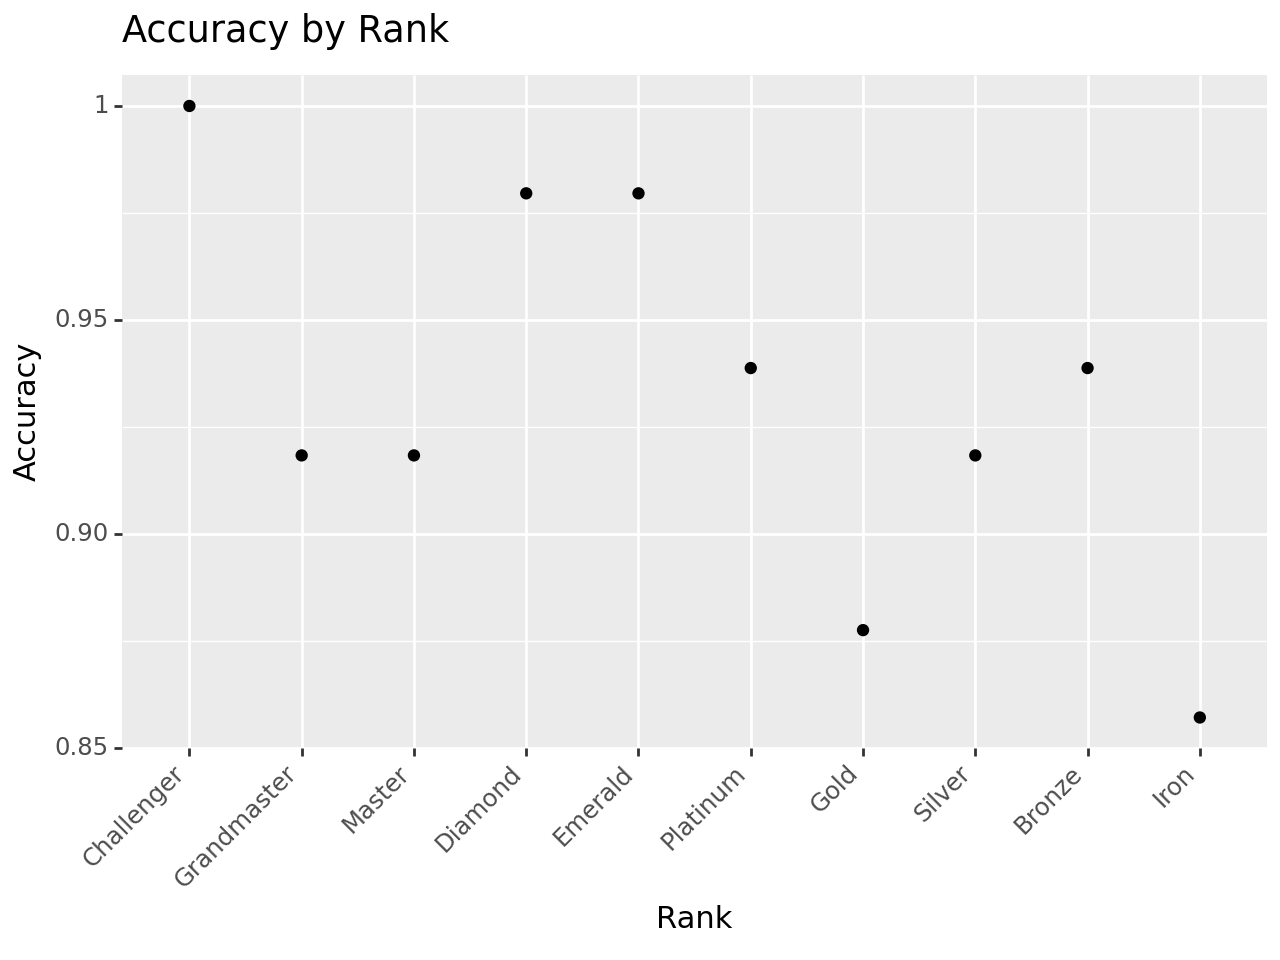

<Figure Size: (640 x 480)>

In [ ]:
rank_order = ["Challenger", "Grandmaster", "Master", "Diamond", "Emerald", "Platinum", "Gold", "Silver", "Bronze", "Iron"]

# Convert "Rank" to categorical with the specified order
multiRank["Rank"] = pd.Categorical(multiRank["Rank"], categories=rank_order, ordered=True)

(ggplot(multiRank, aes(x="Rank", y="Accuracy")) +
 geom_point() +
 labs(title="Accuracy by Rank", x="Rank", y="Accuracy") +
 theme(axis_text_x=element_text(rotation=45, hjust=1))
)












QUESTION 2:
Can we use LASSO in order to find which variables are not very important when it comes to winning games? Can this be applied in real life to change a focus from one target to another?



In [6]:
#----------------------------------------------------------------------  QUESTION 2 ----------------------------------------------------------------------------------------------
#Steps for Q2
# 1.  Train Lasso Model on all of our data

#win0 is in leagueData - confirmed

XL = leagueData[predictors]
yL = leagueData["win0"] #predicts whether the first player wins

# create empty model
z = make_column_transformer((StandardScaler(), contin),
                              (OneHotEncoder(handle_unknown = "ignore"), nonContin),
                              remainder = "passthrough")

lasso = Lasso(alpha = 0)

lassoModel = Pipeline([("zscore", z),
    ("lasso", lasso)])

lassoModel.fit(XL, yL) #fit the lasso model


Pipeline(steps=[('zscore',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['assists0', 'baronKills0',
                                                   'champLevel0', 'championId0',
                                                   'damageDealtToBuildings0',
                                                   'damageDealtToObjectives0',
                                                   'damageDealtToTurrets0',
                                                   'damageSelfMitigated0',
                                                   'deaths0',
                                                   'detectorWardsPlaced0',
                                                   'dragonKills0',
                                                   'firstBloodAssist0',
                                                   'firstBlood...
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['item00', 'item01', 'item02',
                                                   'item03', 'item04', 'item05',
                                                   'item06', 'item07', 'item08',
                                                   'item09', 'item10', 'item11',
                                                   'item12', 'item13', 'item14',
                                                   'item15', 'item16', 'item17',
                                                   'item18', 'item19', 'item20',
                                                   'item21', 'item22', 'item23',
                                                   'item24', 'item25', 'item26',
                                                   'item27', 'item28', 'item29', ...])])),
                ('lasso', Lasso(alpha=0))])

In [7]:
longLeagueData = pd.get_dummies(leagueData, columns = nonContin)

importanceDF = pd.DataFrame()
importanceDF["lassoIMP"] = lasso.coef_
importanceDF.loc[len(importanceDF)] = pd.Series(dtype='float64') #could not find which value was not important, so made an empty row
importanceDF["Features"] = longLeagueData.columns.T #transpose of the columns

print(importanceDF)
# forestIMP = forest.feature_importances #find the coeffs in the random forest

       lassoIMP                 Features
0      0.016816                 assists0
1      0.004230              baronKills0
2      0.015788              champLevel0
3     -0.000018              championId0
4      0.002701  damageDealtToBuildings0
...         ...                      ...
14046 -0.132350       championName9_Zeri
14047 -0.019420      championName9_Ziggs
14048 -0.013668     championName9_Zilean
14049 -0.010684        championName9_Zoe
14050       NaN       championName9_Zyra

[14051 rows x 2 columns]


In [8]:
# 2.  Analyze the results
#P1: Analyze the top 50 important features
importanceDF = importanceDF.sort_values(by = ["lassoIMP"], ascending = False)
importanceDF.head(26)

,lassoIMP,Features
13035,4.737559,championName3_Rell
2875,3.312723,item10_4637
12953,2.937537,championName3_Brand
1419,2.709889,item03_3211
13045,1.919577,championName3_Sett
4377,1.617588,item18_3047
9399,1.558280,item44_3123
13925,1.327848,championName9_FiddleSticks
1417,1.323410,item03_3181
2682,1.314763,item09_4646


In [ ]:
fitted_forest = forest.named_steps["tree"]

featureImportance = fitted_forest.feature_importances_

feature_names = forest[:-1].get_feature_names_out()

featureDF = pd.DataFrame()
featureDF["FeatureNames"] = feature_names.T
featureDF["TreeImportance"] = featureImportance.T

featureDF = featureDF.sort_values(by = "TreeImportance", ascending = False)

featureDF.head(60)

featureDF.to_csv("FeatureImportancesRFModel.csv")